# Ghouls, Goblins, and Ghosts... Boo!
This notebook primarily displays the data from this competition. There are a few helper functions which are captured in ghouls_functions.py after completing this notebook. Other than visualizations and data exploration there are a couple of very very simple models run at the end of the notebook.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')

In [274]:
test = pd.read_csv('test.csv')

## The basics

In [3]:
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [5]:
train.describe(include='all')

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
count,371.000000,371.000000,371.000000,371.000000,371.000000,371,371
unique,NaN,NaN,NaN,NaN,NaN,6,3
top,NaN,NaN,NaN,NaN,NaN,white,Ghoul
freq,NaN,NaN,NaN,NaN,NaN,137,129
mean,443.676550,0.434160,0.506848,0.529114,0.471392,NaN,NaN
std,263.222489,0.132833,0.146358,0.169902,0.176129,NaN,NaN
min,0.000000,0.061032,0.095687,0.134600,0.009402,NaN,NaN
25%,205.500000,0.340006,0.414812,0.407428,0.348002,NaN,NaN
50%,458.000000,0.434891,0.501552,0.538642,0.466372,NaN,NaN
75%,678.500000,0.517223,0.603977,0.647244,0.600610,NaN,NaN


In [6]:
train.type.value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

In [7]:
train.color.value_counts()

white    137
clear    120
green     42
black     41
blue      19
blood     12
Name: color, dtype: int64

## Plotting Basics

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

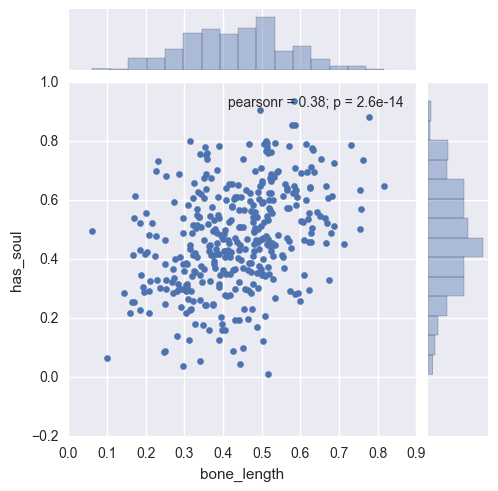

In [20]:
# distributions
sns.jointplot(x='bone_length',y='has_soul',data=train,size=5)

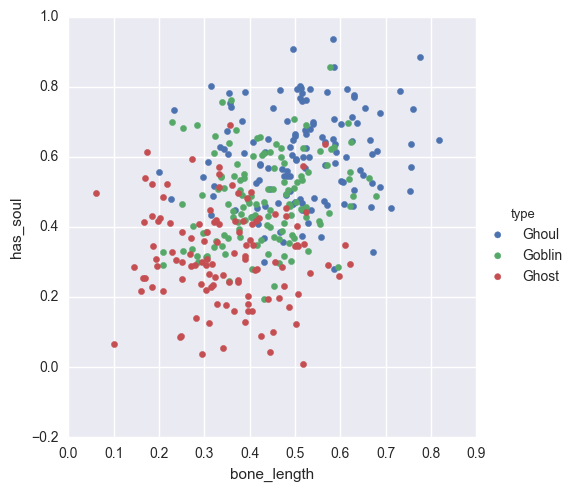

In [21]:
sns.FacetGrid(train, hue="type", size=5) \
   .map(plt.scatter, "bone_length", "has_soul") \
   .add_legend()

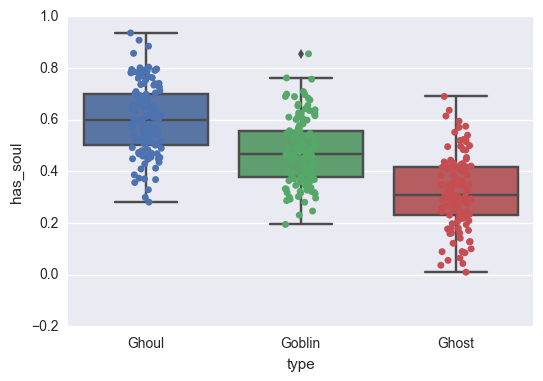

In [25]:
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="type", y="has_soul", data=train)
ax = sns.stripplot(x="type", y="has_soul", data=train, jitter=True, edgecolor="gray")

/Library/anaconda/envs/ghouls/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


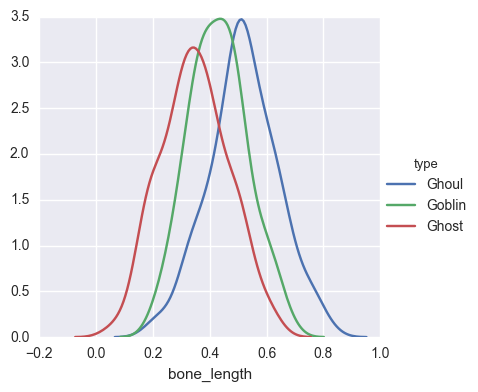

In [28]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(train, hue="type", size=4) \
   .map(sns.kdeplot, "bone_length") \
   .add_legend()

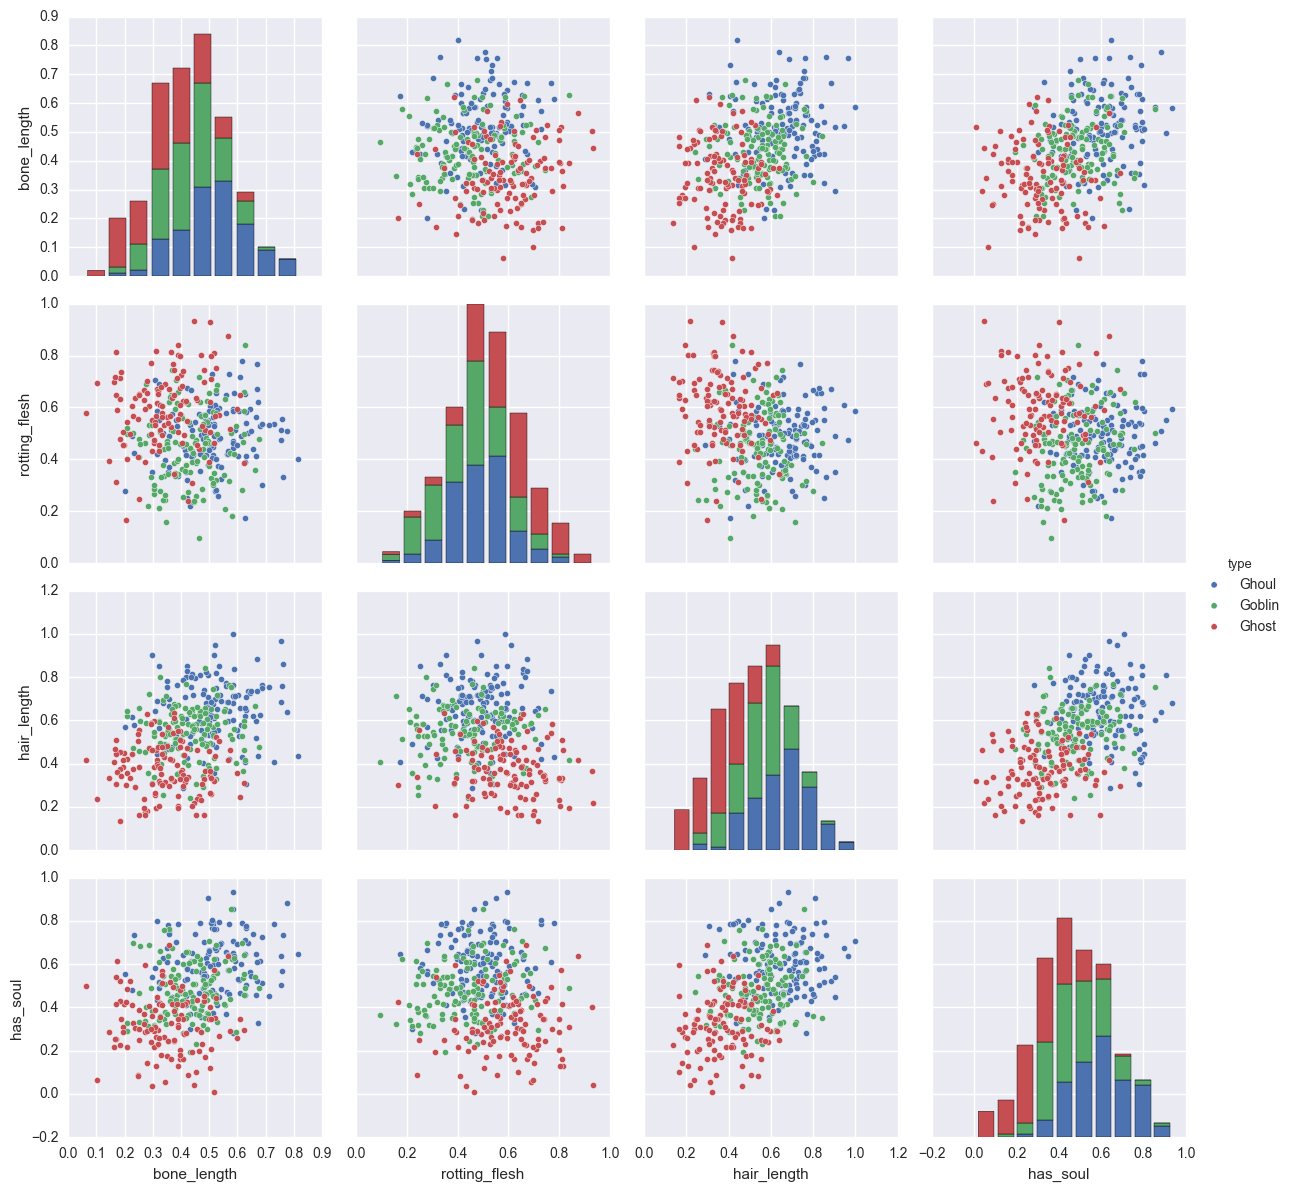

In [30]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(train.drop("id", axis=1), hue="type", size=3)

/Library/anaconda/envs/ghouls/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


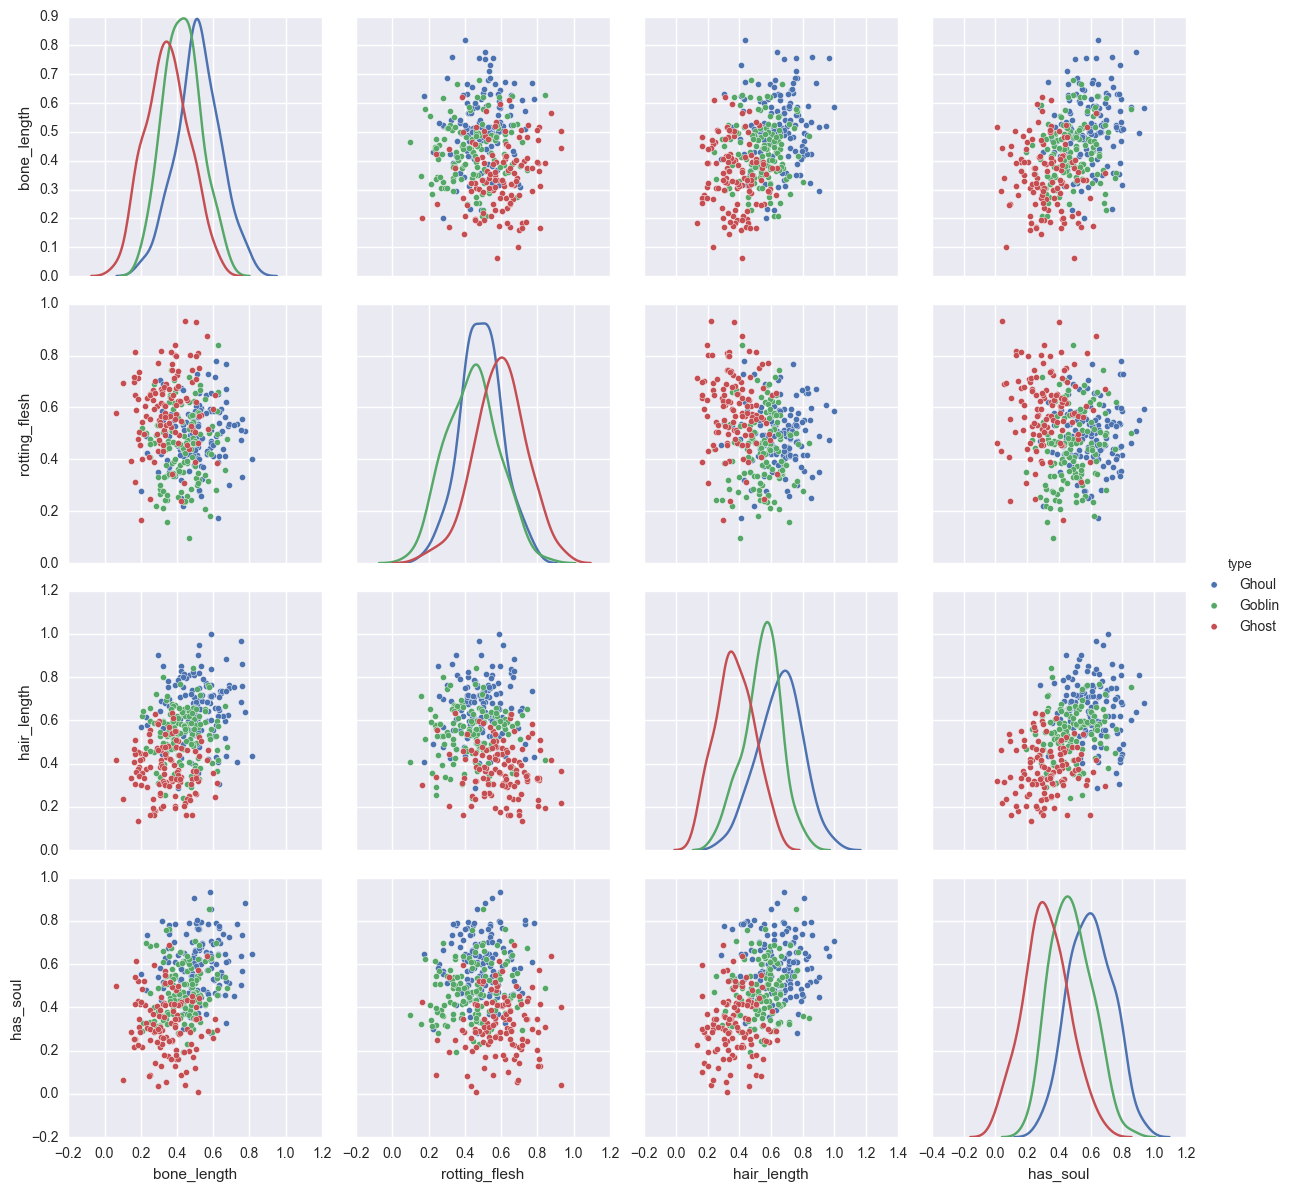

In [31]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(train.drop("id", axis=1), hue="type", size=3, diag_kind="kde")

In [34]:
# there might be better seperation if we evalaute the data by category i.e. color
df_list = [train[train.color == color] for color in train.color.unique()]

/Library/anaconda/envs/ghouls/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


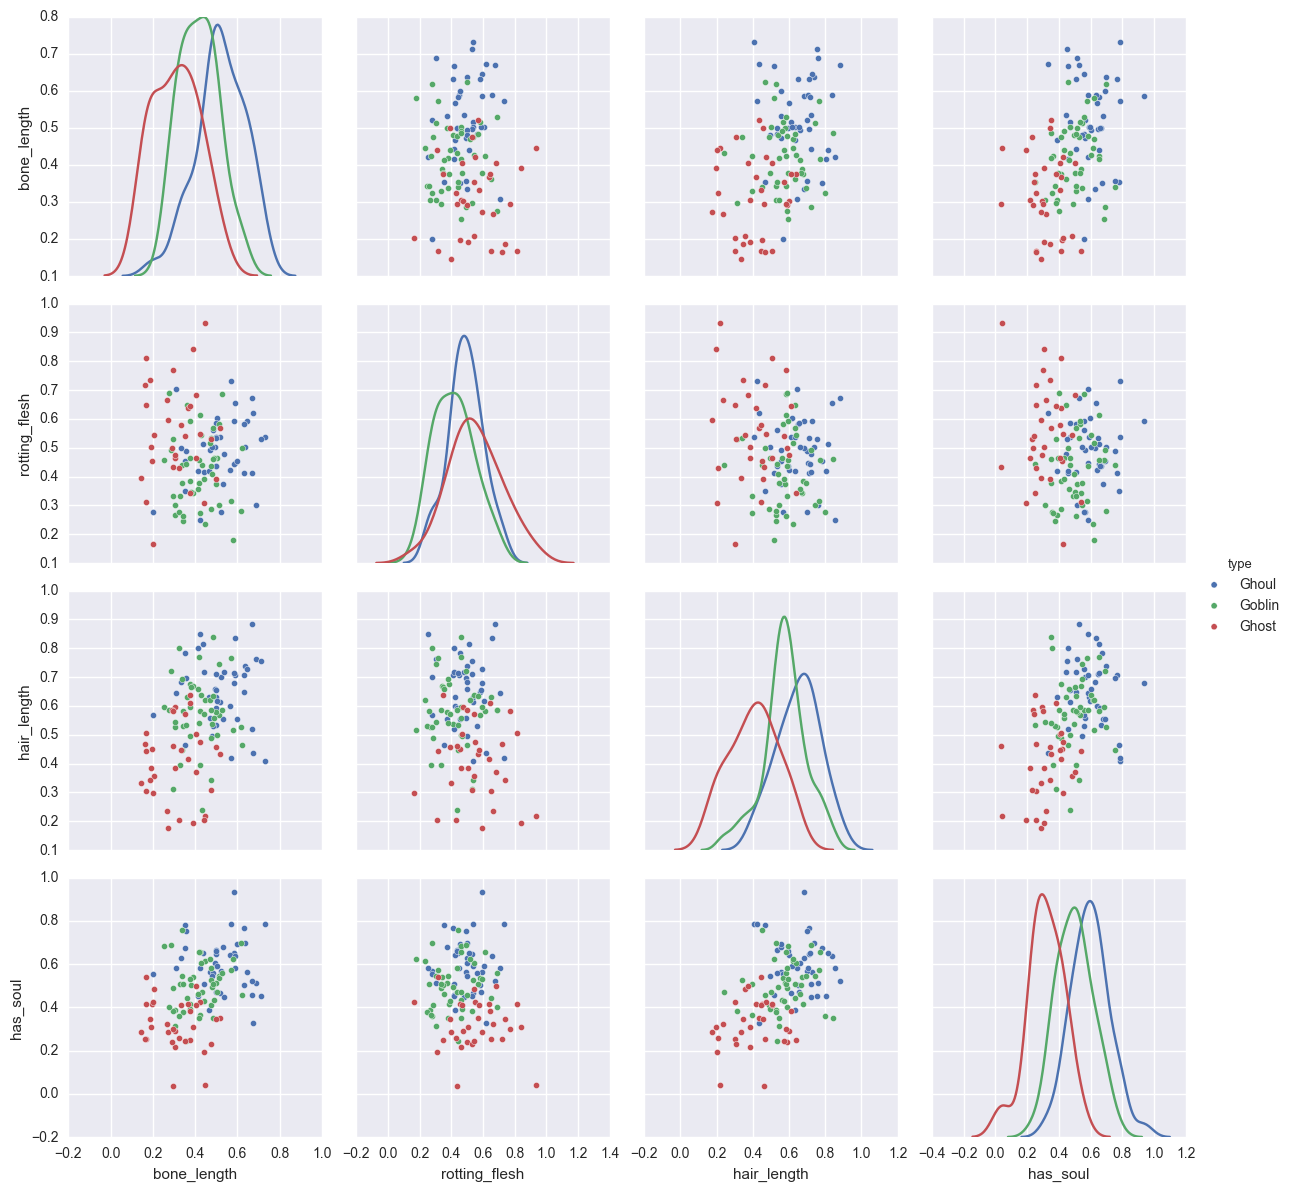

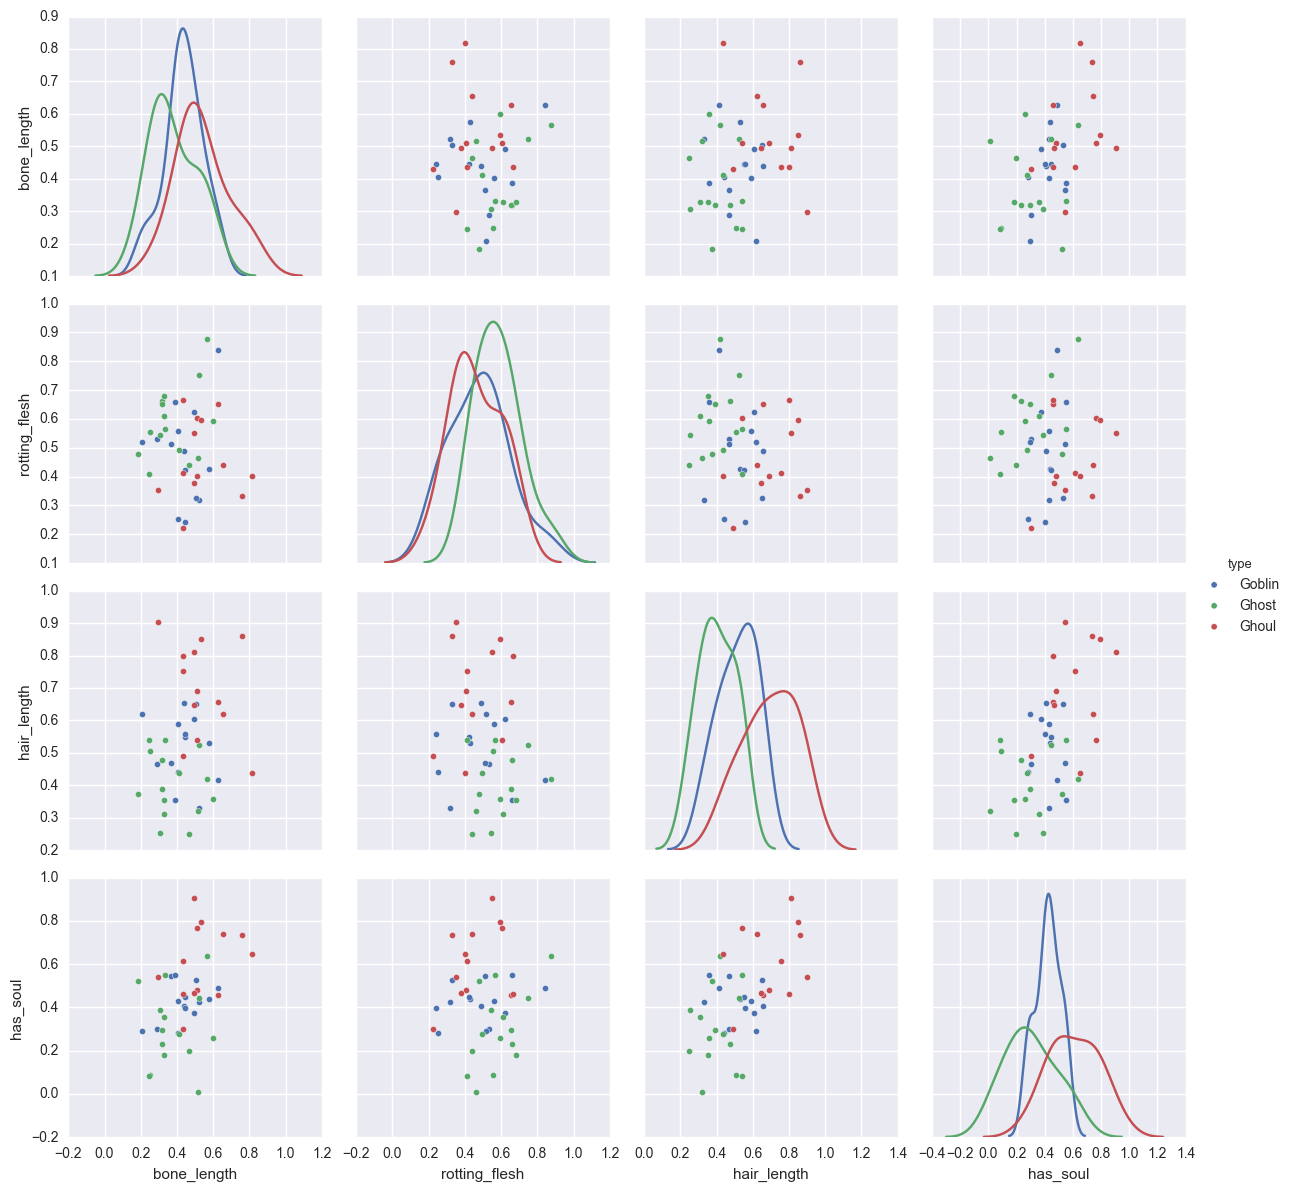

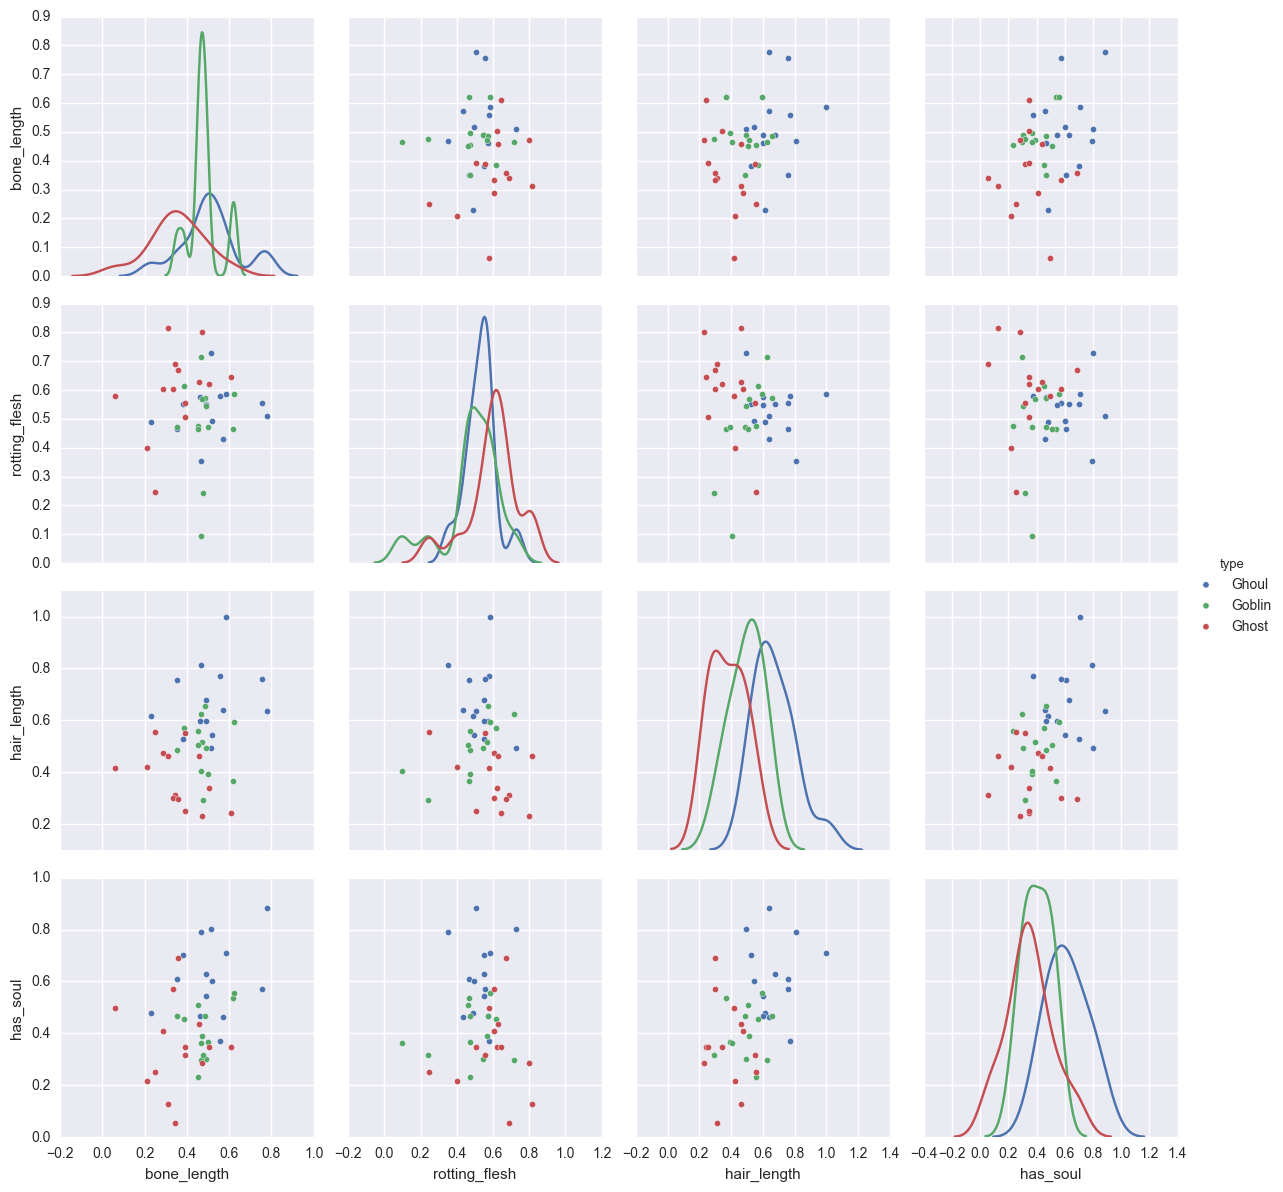

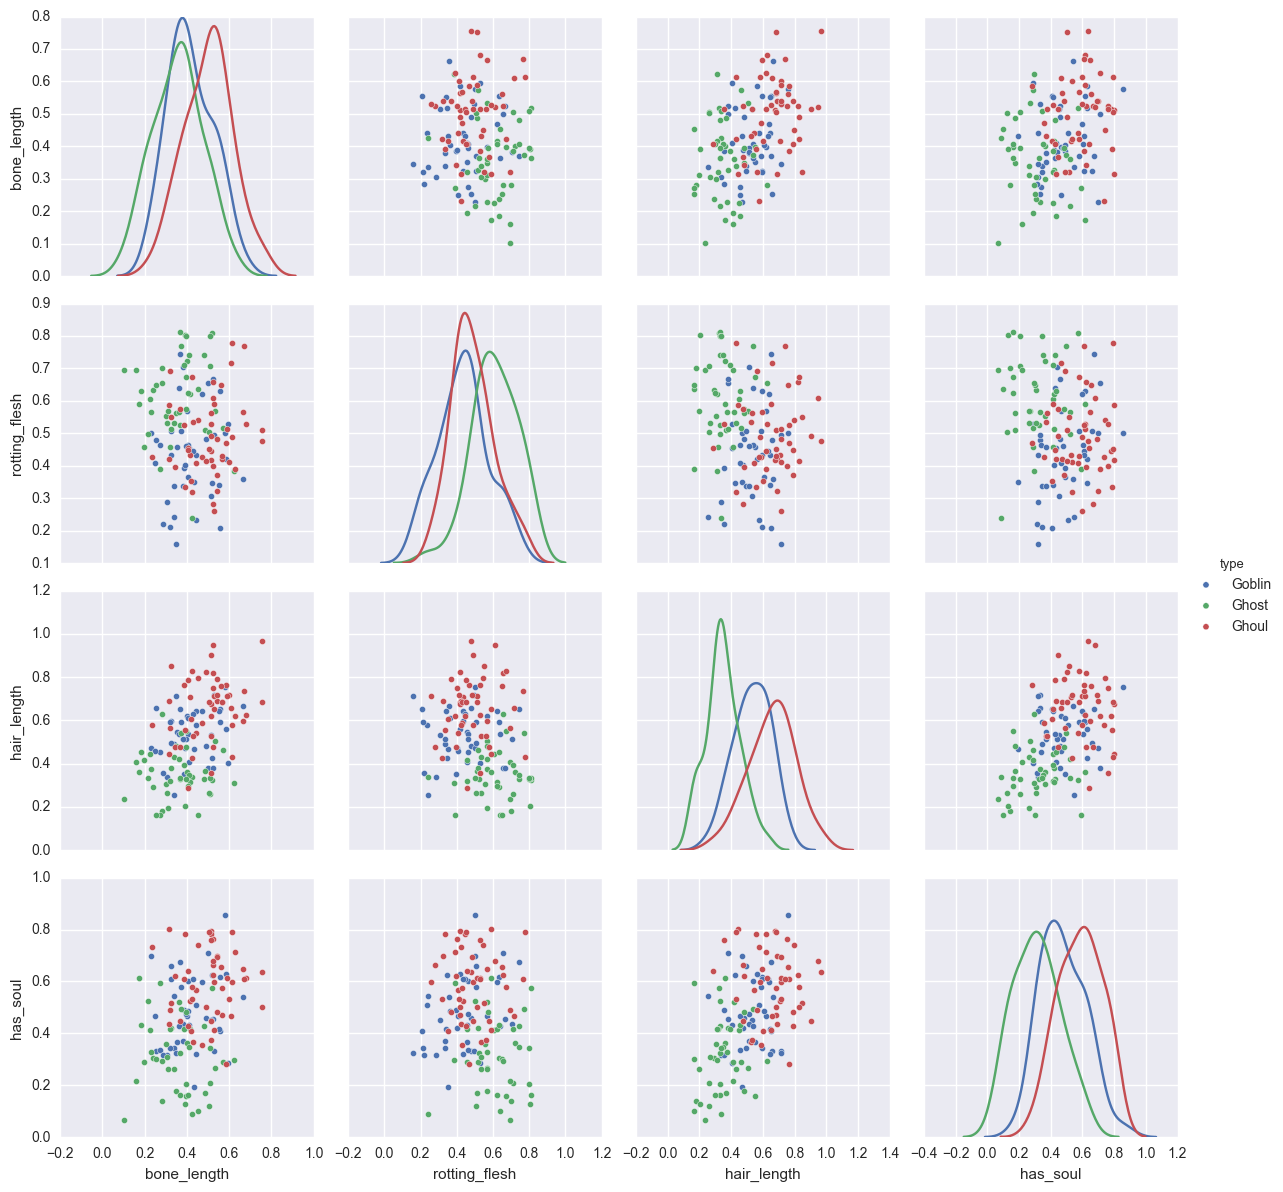

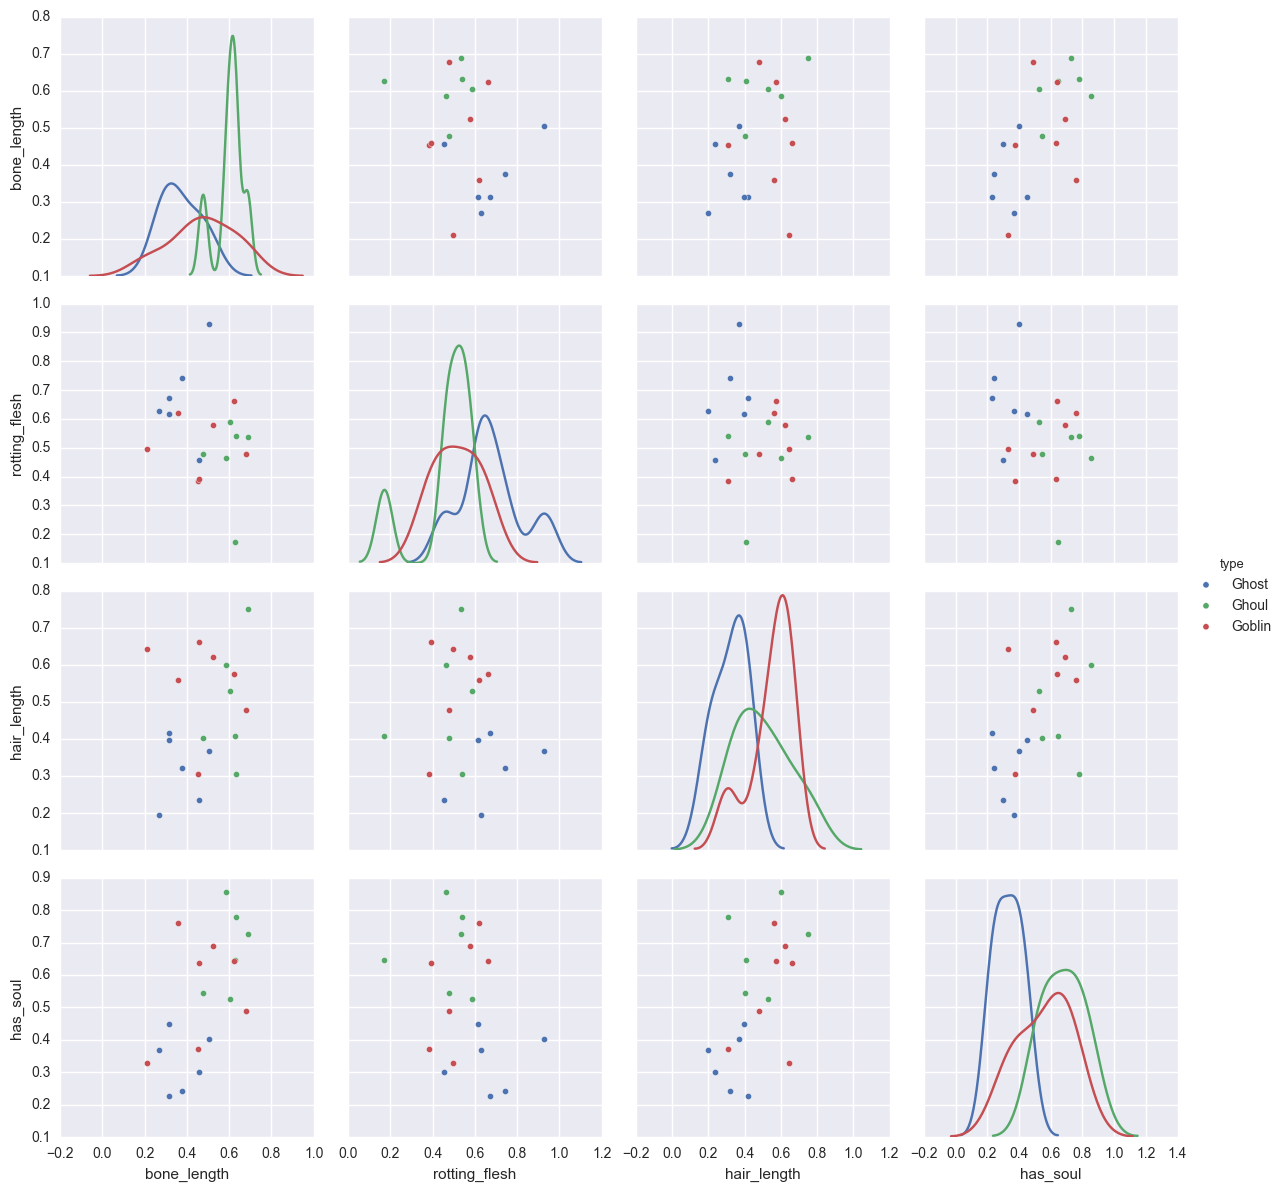

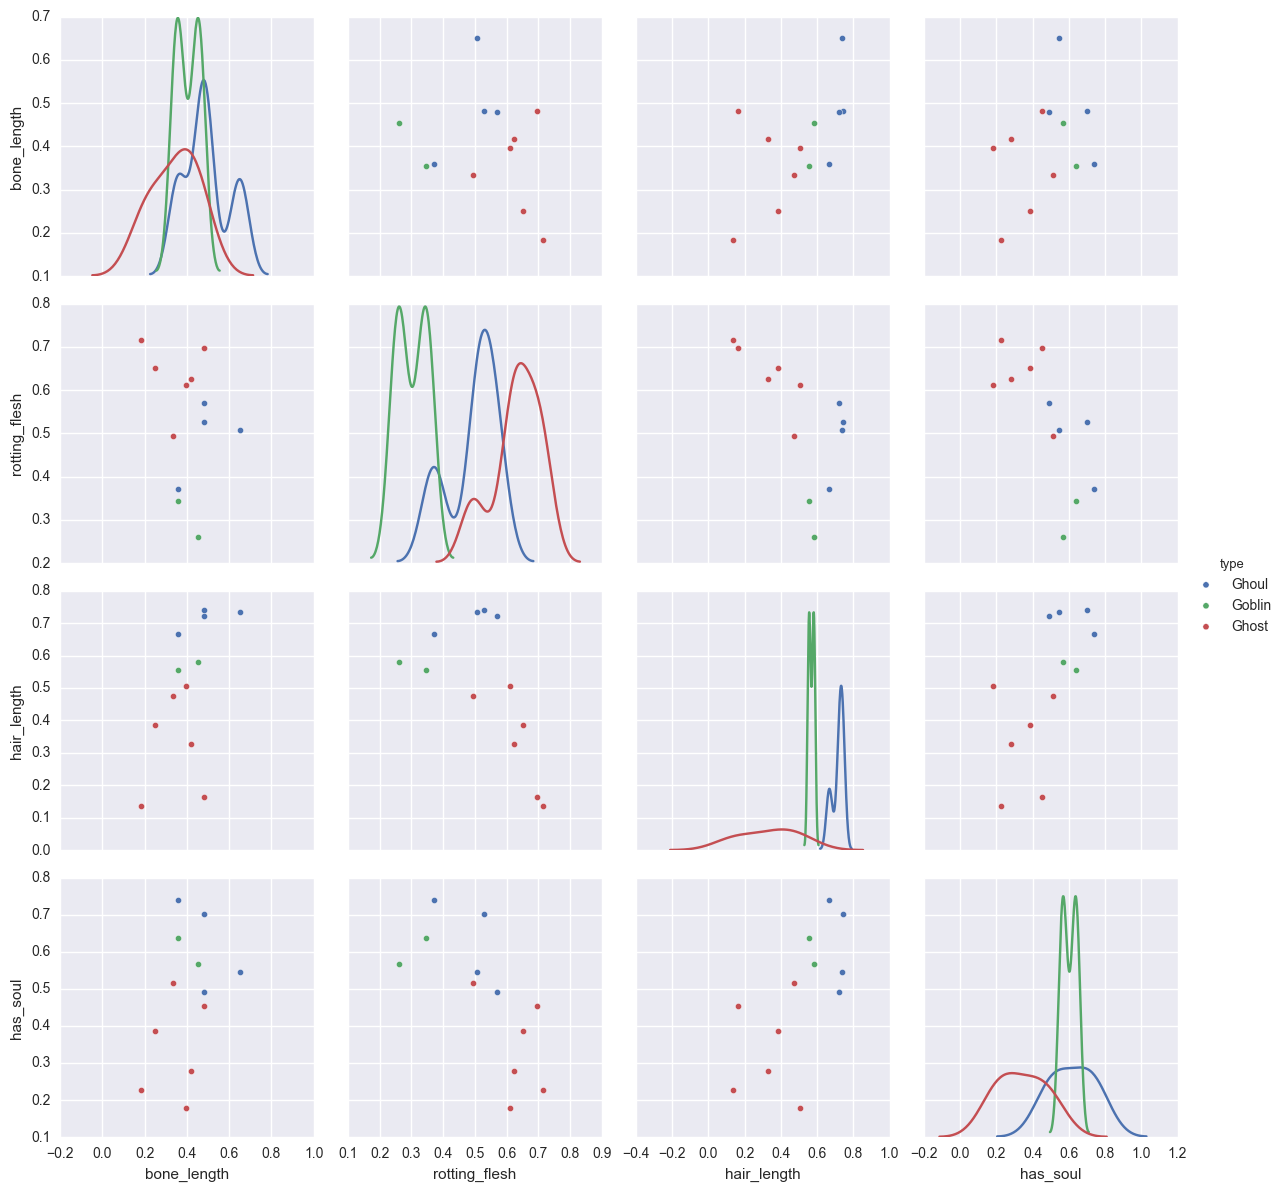

In [37]:
for i in range(len(df_list)):
    sns.pairplot(df_list[i].drop("id", axis=1), hue="type", size=3, diag_kind="kde")

## Feature Importance

In [38]:
# use a tree to determine feature importances
from sklearn.ensemble import RandomForestClassifier

In [76]:
# lets prep our features
X = pd.get_dummies(train.drop(['id','type'],axis=1))
feature_names = X.columns

In [55]:
train.type.unique()

array(['Ghoul', 'Goblin', 'Ghost'], dtype=object)

In [77]:
# we also need to format our target variable 
type_dict = {'Ghoul':0,'Goblin':1,'Ghost':2}
Y = train.type.map(type_dict)

### lets make some new features based on polynomials

In [277]:
# I want to use the sklearn polynomial features but dont want to deal with labels!
# http://stackoverflow.com/questions/36728287/sklearn-preprocessing-polynomialfeatures-how-to-keep-column-names-headers-of
def PolynomialFeatures_labeled(input_df,power):
    '''Basically this is a cover for the sklearn preprocessing function. 
    The problem with that function is if you give it a labeled dataframe, it ouputs an unlabeled dataframe with potentially
    a whole bunch of unlabeled columns. 

    Inputs:
    input_df = Your labeled pandas dataframe (list of x's not raised to any power) 
    power = what order polynomial you want variables up to. (use the same power as you want entered into pp.PolynomialFeatures(power) directly)

    Ouput:
    Output: This function relies on the powers_ matrix which is one of the preprocessing function's outputs to create logical labels and 
    outputs a labeled pandas dataframe   
    '''
    from sklearn import preprocessing as pp
    
    poly = pp.PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

In [289]:
output_df = PolynomialFeatures_labeled(input_df=\
                X.drop(['color_black','color_blood','color_blue',\
                        'color_clear','color_green','color_white'],axis=1),power=3)
feature_names = output_df.columns
output_df.head()

,Constant Term,bone_length^1,rotting_flesh^1,hair_length^1,has_soul^1,bone_length^2,bone_length^1 x rotting_flesh^1,bone_length^1 x hair_length^1,bone_length^1 x has_soul^1,rotting_flesh^2,...,rotting_flesh^3,rotting_flesh^2 x hair_length^1,rotting_flesh^2 x has_soul^1,rotting_flesh^1 x hair_length^2,rotting_flesh^1 x hair_length^1 x has_soul^1,rotting_flesh^1 x has_soul^2,hair_length^3,hair_length^2 x has_soul^1,hair_length^1 x has_soul^2,has_soul^3
0,1.0,0.354512,0.350839,0.465761,0.781142,0.125679,0.124377,0.165118,0.276924,0.123088,...,0.043184,0.057330,0.096149,0.076109,0.127644,0.214076,0.101039,0.169456,0.284199,0.476639
1,1.0,0.575560,0.425868,0.531401,0.439899,0.331269,0.245113,0.305853,0.253188,0.181364,...,0.077237,0.096377,0.079782,0.120260,0.099552,0.082410,0.150061,0.124222,0.102832,0.085125
2,1.0,0.467875,0.354330,0.811616,0.791225,0.218907,0.165783,0.379735,0.370195,0.125550,...,0.044486,0.101898,0.099338,0.233405,0.227541,0.221824,0.534628,0.521196,0.508102,0.495336
3,1.0,0.776652,0.508723,0.636766,0.884464,0.603189,0.395101,0.494546,0.686921,0.258799,...,0.131657,0.164794,0.228898,0.206272,0.286511,0.397961,0.258190,0.358624,0.498126,0.691895
4,1.0,0.566117,0.875862,0.418594,0.636438,0.320488,0.495840,0.236973,0.360298,0.767134,...,0.671903,0.321117,0.488233,0.153469,0.233337,0.354771,0.073346,0.111517,0.169553,0.257791


In [290]:
# then we can make a tree to explore the feature importance
tree = RandomForestClassifier(random_state=1)
# tree.fit(X.values, Y.values)
tree.fit(output_df.values,Y.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [291]:
# and what are our feature importances
feature_list = sorted(list(zip(tree.feature_importances_,feature_names)),reverse=True)
for n,i in enumerate(feature_list):
    print('{})\t'.format(n),i[0],'\t',i[1])

0)	 0.123646952607 	 hair_length^1 x has_soul^1
1)	 0.0687360549874 	 bone_length^1 x hair_length^1 x has_soul^1
2)	 0.0654784343076 	 hair_length^1 x has_soul^2
3)	 0.0532085705686 	 bone_length^2 x hair_length^1
4)	 0.049225502241 	 bone_length^1 x hair_length^2
5)	 0.0480826594814 	 bone_length^1 x rotting_flesh^1 x hair_length^1
6)	 0.0453649988056 	 hair_length^2 x has_soul^1
7)	 0.0445426164824 	 bone_length^1 x has_soul^1
8)	 0.0378073663303 	 hair_length^2
9)	 0.0336615447815 	 has_soul^3
10)	 0.0290176895429 	 rotting_flesh^1
11)	 0.0280888046955 	 bone_length^1 x hair_length^1
12)	 0.0245303527108 	 rotting_flesh^3
13)	 0.0242270618191 	 rotting_flesh^2
14)	 0.0217334897489 	 bone_length^1 x has_soul^2
15)	 0.0208891880254 	 rotting_flesh^1 x hair_length^1
16)	 0.0205496942362 	 bone_length^2 x has_soul^1
17)	 0.0203783841412 	 bone_length^2
18)	 0.0199183543773 	 has_soul^1
19)	 0.0194589381386 	 has_soul^2
20)	 0.0186987952715 	 rotting_flesh^1 x hair_length^1 x has_soul^1


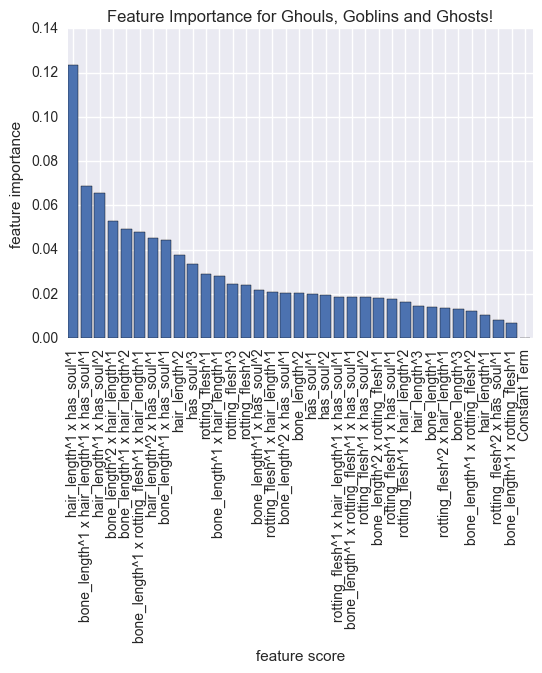

In [292]:
# a list is nice but a plot is better
feature_names = [feature[1] for feature in feature_list]
feature_score = [feature[0] for feature in feature_list]

width = .8
ind = np.arange(len(feature_names))

plt.bar(left=ind, height=feature_score, width=.8)
plt.ylabel('feature importance')
plt.xlabel('feature score')
plt.xticks(ind + width/2, feature_names, rotation=90)
plt.title('Feature Importance for Ghouls, Goblins and Ghosts!')
plt.show()

In [111]:
# # and what are our feature importances
# feature_list = sorted(list(zip(tree.feature_importances_,feature_names)),reverse=True)
# for n,i in enumerate(feature_list):
#     print('{})\t'.format(n),i[0],'\t',i[1])

0)	 0.300116463103 	 has_soul
1)	 0.281571272081 	 hair_length
2)	 0.184345771767 	 bone_length
3)	 0.181288935426 	 rotting_flesh
4)	 0.0130030800642 	 color_clear
5)	 0.010752343537 	 color_blue
6)	 0.00900926182297 	 color_white
7)	 0.00854315461762 	 color_green
8)	 0.0081608522256 	 color_black
9)	 0.00320886535578 	 color_blood


### Evaluating Some Models
To get started I'll refer to the [sklearn cheat sheet](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html). There is also a nice plotting example which is modifed below found [here](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py)

In [179]:
# Linear SVC
from sklearn.svm import LinearSVC

#### Keeping it Simple

In [293]:
clf = LinearSVC()
clf.fit(X.values,Y.values)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [297]:
# this score doesn't mean anything
clf.score(X.values,Y.values)

0.75471698113207553

#### A more generalized view of our model

In [182]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [298]:
clf = LinearSVC()
scores = cross_val_score(clf,X.values,Y.values,cv=10)
# print(scores) #accuracy scores for 10 cross folds
print('CV accuracy {0:.3f} +/- {1:.3f}'.format(np.mean(scores),np.std(scores)))

CV accuracy 0.716 +/- 0.068


In [231]:
# we can use polynomial to check non-linearity
pipe_lin_svc = Pipeline([('poly',PolynomialFeatures(degree=3)),
                         ('svc',LinearSVC())])
# we will check this using Stratified KFolds
kfold = StratifiedKFold(n_splits=10)
scores = []
for (train,test) in kfold.split(X.values,Y.values):
    pipe_lin_svc.fit(X.values[train],Y.values[train])
    score = pipe_lin_svc.score(X.values[test], Y.values[test])
    scores.append(score)

print('CV Accuracy: {0:.3f} +/- {1:.3f}'.format(np.mean(scores),np.std(scores)))

CV Accuracy: 0.730 +/- 0.064


In [232]:
# or more simply
scores = cross_val_score(pipe_lin_svc,X.values,Y.values,cv=10)
print('CV Accuracy: {0:.3f} +/- {1:.3f}'.format(np.mean(scores),np.std(scores)))

CV Accuracy: 0.730 +/- 0.064


#### A Neat Plot

In [154]:

def LinearSVC_2D_plot(clf,feature_1,feature_2):
    """plots a 2D LinearSVC model based on 2 features 
       e.g. clf = LinearSVC()
            feature_1 = 'has_soul'
            feature_2 = 'hair_length'"""
    if clf == None:
        clf = LinearSVC()
    clf.fit(X[[feature_1,feature_2]].values, Y.values)
    print('score: {:.3f}'.format(clf.score(X[[feature_1,feature_2]].values, Y.values)))
    
    h = .02  # step size in the mesh

    # create a mesh to plot in
    x_min, x_max = X[feature_1].values.min() - 1, X[feature_1].values.max() + 1
    y_min, y_max = X[feature_2].values.min() - 1, X[feature_2].values.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[feature_1].values, X[feature_2].values, c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
#     plt.xlim(-.25,1.25)
#     plt.ylim(-.25, 1.25)
    plt.xticks(())
    plt.show()

In [150]:
clf.score(X[[feature_1,feature_2]].values, Y.values)

0.67115902964959573

score: 0.671


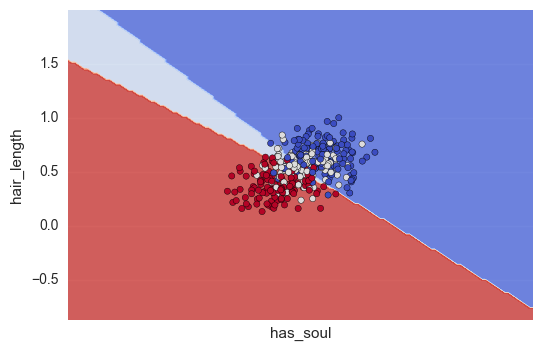

In [157]:
# an example using our two top features
LinearSVC_2D_plot('has_soul','hair_length')

### More SVM
Since SVM is generally a robust algorithm, lets see if we cant tune it a bit to yield a better result

In [206]:
# build some svm pipes that evaluate a few different variations of SVM
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [302]:

pipe_svc = Pipeline([#('scl',StandardScaler()), # surprisingly this does better without the StandardScaler
                      ('poly',PolynomialFeatures(degree=3)),
                      ('clf',SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = [{'clf__C': param_range,
               'clf__kernel': ['linear']},
              {'clf__C': param_range,
               'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10,
                 n_jobs=-1)

In [303]:
gs = gs.fit(X.values,Y.values)
print(gs.best_score_)
print(gs.best_params_)

0.7277628032345014
{'clf__kernel': 'rbf', 'clf__gamma': 0.01, 'clf__C': 10.0}


In [305]:
### A LATE ADDITION ###
# this is simply a focused look at nested cross validation
# the take away here is that nested cross fold is not a substitute for the GS best params
# in fact the outer loop makes it difficult to even know what the best params should be
# this could be useful to see the 2nd and 3rd best params though
from sklearn.cross_validation import StratifiedShuffleSplit

cv_outer = StratifiedShuffleSplit(Y.values, n_iter=10,test_size=0.2, random_state=1)

for training_set_indices_i, testing_set_indices_i in cv_outer:
    training_set_i = X.values[training_set_indices_i], Y.values[training_set_indices_i]
    testing_set_i = X.values[testing_set_indices_i], Y.values[testing_set_indices_i]
    gs.fit(*training_set_i)
    print(gs.best_params_, '\t\t', gs.score(*testing_set_i))



/Library/anaconda/envs/ghouls/lib/python3.5/site-packages/sklearn/grid_search.py:426: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


{'clf__kernel': 'rbf', 'clf__gamma': 0.01, 'clf__C': 10.0} 		 0.786666666667


/Library/anaconda/envs/ghouls/lib/python3.5/site-packages/sklearn/grid_search.py:426: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


{'clf__kernel': 'rbf', 'clf__gamma': 0.01, 'clf__C': 10.0} 		 0.72


/Library/anaconda/envs/ghouls/lib/python3.5/site-packages/sklearn/grid_search.py:426: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


{'clf__kernel': 'linear', 'clf__C': 1.0} 		 0.733333333333


/Library/anaconda/envs/ghouls/lib/python3.5/site-packages/sklearn/grid_search.py:426: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


{'clf__kernel': 'linear', 'clf__C': 10.0} 		 0.706666666667


/Library/anaconda/envs/ghouls/lib/python3.5/site-packages/sklearn/grid_search.py:426: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


{'clf__kernel': 'rbf', 'clf__gamma': 0.01, 'clf__C': 10.0} 		 0.706666666667


/Library/anaconda/envs/ghouls/lib/python3.5/site-packages/sklearn/grid_search.py:426: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


{'clf__kernel': 'rbf', 'clf__gamma': 0.01, 'clf__C': 100.0} 		 0.72


/Library/anaconda/envs/ghouls/lib/python3.5/site-packages/sklearn/grid_search.py:426: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


{'clf__kernel': 'linear', 'clf__C': 1.0} 		 0.693333333333


/Library/anaconda/envs/ghouls/lib/python3.5/site-packages/sklearn/grid_search.py:426: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


{'clf__kernel': 'linear', 'clf__C': 10.0} 		 0.746666666667


/Library/anaconda/envs/ghouls/lib/python3.5/site-packages/sklearn/grid_search.py:426: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


{'clf__kernel': 'linear', 'clf__C': 0.1} 		 0.706666666667
{'clf__kernel': 'rbf', 'clf__gamma': 0.001, 'clf__C': 100.0} 		 0.72


/Library/anaconda/envs/ghouls/lib/python3.5/site-packages/sklearn/grid_search.py:426: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


In [ ]:
# it really looks like a simple approach SVM just isn't going to get this one done
# not entirely surprsing given that the variables are all heavily clustered together

### Lets see how an Ensemble Classifier like Random Forest handles this

In [251]:
pipe_rf = Pipeline([('clf',RandomForestClassifier(random_state=1))])

param_grid = [{'clf__criterion':['gini','entropy'],
               'clf__max_features': [2,4,5,"sqrt","log2"],
               'clf__min_samples_split': [2,5,7,10]}]

gs = GridSearchCV(estimator=pipe_rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

In [252]:
gs = gs.fit(X.values,Y.values)
print(gs.best_score_)
print(gs.best_params_)

0.738544474393531
{'clf__criterion': 'gini', 'clf__min_samples_split': 5, 'clf__max_features': 4}


In [242]:
pipe_rf.get_params().keys()

dict_keys(['clf__criterion', 'clf__min_weight_fraction_leaf', 'clf__n_jobs', 'clf__max_depth', 'clf__oob_score', 'clf__bootstrap', 'clf__max_features', 'clf__random_state', 'clf__class_weight', 'clf__n_estimators', 'clf__warm_start', 'clf__max_leaf_nodes', 'clf__verbose', 'clf__min_impurity_split', 'clf__min_samples_split', 'clf__min_samples_leaf', 'clf', 'steps'])

### This is probably a good start, lets see how we do with Kaggle

In [300]:
# lets try our Random Forest with our GS parameters first
clf = RandomForestClassifier(criterion='gini',min_samples_split=5,max_features=4,random_state=1)
clf.fit(X.values,Y.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [301]:
scores = cross_val_score(clf,X.values,Y.values,cv=10)
print('CV Accuracy: {0:.3f} +/- {1:.3f}'.format(np.mean(scores),np.std(scores)))

CV Accuracy: 0.738 +/- 0.075
